In [3]:
import pandas as pd

In [4]:
# Reading the dataset_orig into pandas
dataset_orig = pd.read_csv('troop_movements.csv')

dataset_vis = dataset_orig.copy ()

print(dataset_vis.head())

             timestamp  unit_id           unit_type empire_or_resistance  \
0  2025-07-09 09:10:23        1             unknown               empire   
1  2025-07-09 09:10:22        2  resistance_soldier           resistance   
2  2025-07-09 09:10:21        3               at-at           resistance   
3  2025-07-09 09:10:20        4              x-wing           resistance   
4  2025-07-09 09:10:19        5             unknown           resistance   

   location_x  location_y  destination_x  destination_y homeworld  
0          10           8              8              6  Toydaria  
1           7           2              6              7      Ojom  
2           4          10              6              4   Vulpter  
3           3           2              6              9  Kashyyyk  
4           3           5              7             10      Ojom  


In [5]:
unit_count = dataset_vis['unit_type'].value_counts()
print(unit_count)

unit_type
at-at                 139
at-st                 131
stormtrooper          130
unknown               129
resistance_soldier    128
tie_fighter           127
tie_silencer          109
x-wing                107
Name: count, dtype: int64


In [6]:
unit_count = dataset_vis['empire_or_resistance'].value_counts()
print(unit_count)

empire_or_resistance
empire        506
resistance    494
Name: count, dtype: int64


In [7]:
homeworld_count = dataset_vis['homeworld'].value_counts()
print(homeworld_count)

homeworld
Vulpter         37
Haruun Kal      36
Ojom            34
Ryloth          32
Iridonia        31
Kashyyyk        30
Troiken         27
Corellia        27
Muunilinst      27
Aleen Minor     26
Bestine IV      25
Rodia           25
Eriadu          25
Tatooine        25
Mon Cala        25
Concord Dawn    24
Shili           24
Skako           24
Glee Anselm     23
Kalee           23
Trandosha       22
Quermia         22
Toydaria        22
Champala        22
Dorin           22
Naboo           22
Mirial          22
Stewjon         22
Tund            21
Socorro         21
Dagobah         21
Umbara          21
Dathomir        20
Zolan           20
Tholoth         20
Malastare       20
Serenno         19
Iktotch         19
Cerea           19
Chandrila       18
Alderaan        18
Sullust         17
Name: count, dtype: int64


In [8]:
dataset_vis["is_resistance"] = dataset_vis["empire_or_resistance"] == "resistance"

print (dataset_vis[["empire_or_resistance", "is_resistance"]])

    empire_or_resistance  is_resistance
0                 empire          False
1             resistance           True
2             resistance           True
3             resistance           True
4             resistance           True
..                   ...            ...
995           resistance           True
996               empire          False
997               empire          False
998           resistance           True
999           resistance           True

[1000 rows x 2 columns]


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

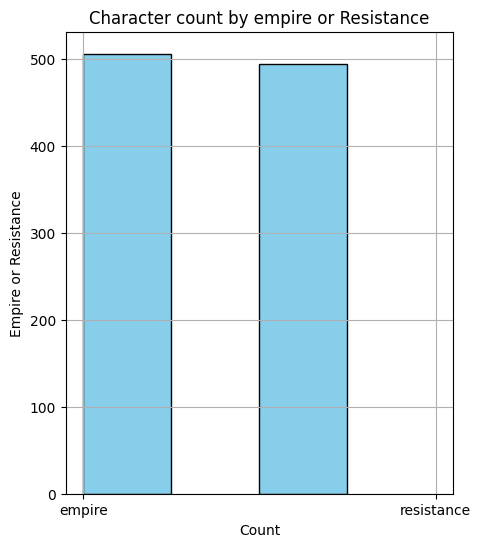

In [10]:
plt.figure (figsize=(5, 6))
plt.hist(dataset_vis['empire_or_resistance'], bins=2, color='skyblue', edgecolor='black', width=0.25)
plt.title('Character count by empire or Resistance')
plt.xlabel('Count')
plt.ylabel('Empire or Resistance')
plt.grid(True)
plt.show()

In [11]:
# Make a copy of the dataset_orig before preprocessing
dataset = dataset_orig.copy ()

print (dataset.head ())

             timestamp  unit_id           unit_type empire_or_resistance  \
0  2025-07-09 09:10:23        1             unknown               empire   
1  2025-07-09 09:10:22        2  resistance_soldier           resistance   
2  2025-07-09 09:10:21        3               at-at           resistance   
3  2025-07-09 09:10:20        4              x-wing           resistance   
4  2025-07-09 09:10:19        5             unknown           resistance   

   location_x  location_y  destination_x  destination_y homeworld  
0          10           8              8              6  Toydaria  
1           7           2              6              7      Ojom  
2           4          10              6              4   Vulpter  
3           3           2              6              9  Kashyyyk  
4           3           5              7             10      Ojom  


In [12]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline

In [13]:
cat_onehot_pipeline = make_pipeline(OneHotEncoder(handle_unknown="ignore"))

In [14]:
columns_to_drop = [
    "timestamp",
    "unit_id",
    "location_x",
    "location_y",
    "destination_x",
    "destination_y",
]

preprocessing = ColumnTransformer([
    ("cat_onehot", cat_onehot_pipeline, ["unit_type", "homeworld"]),
    ("drop_column", "drop", columns_to_drop)
], remainder="drop")

dataset_trans = preprocessing.fit_transform (dataset)
dataset_df = pd.DataFrame(dataset_trans.toarray (), columns=preprocessing.get_feature_names_out())

print (dataset_df.columns.tolist())

['cat_onehot__unit_type_at-at', 'cat_onehot__unit_type_at-st', 'cat_onehot__unit_type_resistance_soldier', 'cat_onehot__unit_type_stormtrooper', 'cat_onehot__unit_type_tie_fighter', 'cat_onehot__unit_type_tie_silencer', 'cat_onehot__unit_type_unknown', 'cat_onehot__unit_type_x-wing', 'cat_onehot__homeworld_Alderaan', 'cat_onehot__homeworld_Aleen Minor', 'cat_onehot__homeworld_Bestine IV', 'cat_onehot__homeworld_Cerea', 'cat_onehot__homeworld_Champala', 'cat_onehot__homeworld_Chandrila', 'cat_onehot__homeworld_Concord Dawn', 'cat_onehot__homeworld_Corellia', 'cat_onehot__homeworld_Dagobah', 'cat_onehot__homeworld_Dathomir', 'cat_onehot__homeworld_Dorin', 'cat_onehot__homeworld_Eriadu', 'cat_onehot__homeworld_Glee Anselm', 'cat_onehot__homeworld_Haruun Kal', 'cat_onehot__homeworld_Iktotch', 'cat_onehot__homeworld_Iridonia', 'cat_onehot__homeworld_Kalee', 'cat_onehot__homeworld_Kashyyyk', 'cat_onehot__homeworld_Malastare', 'cat_onehot__homeworld_Mirial', 'cat_onehot__homeworld_Mon Cala', 

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

model = pipeline = Pipeline([
    ('data_preprocessing', preprocessing),
    ('random_forest', DecisionTreeClassifier(random_state=42, class_weight='balanced'))
])


In [16]:
from sklearn.model_selection import train_test_split
X = dataset.drop(columns=['empire_or_resistance'], axis=1)
y = dataset['empire_or_resistance']

X_train, X_test, y_train, y_test = train_test_split (X,y,test_size=0.2, random_state = 42)

In [17]:
model.fit(X_train, y_train)

,steps,"[('data_preprocessing', ...), ('random_forest', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat_onehot', ...), ('drop_column', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [18]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def eval_model (model, y, y_pred):
    accuracy = accuracy_score (y, y_pred)
    print ("Accuracy:", accuracy)

    # Creating the confusion matrix using the training set
    cm = confusion_matrix(y, y_pred)

    # Plotting the confusion matrix
    plt.figure(figsize=(2, 2))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title('Confusion Matrix for Random Forest (Training Set)')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

Accuracy: 0.80375


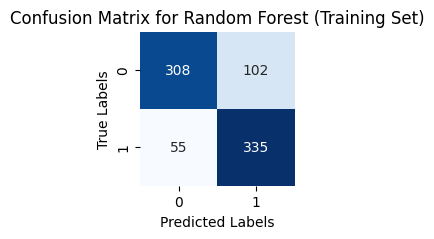

In [34]:
y_pred = model.predict (X_train)

eval_model (model, y_train, y_pred)

In [20]:
#creating bar plot
importances = model.named_steps["random_forest"].feature_importances_

#dataframe to hold the feature importances
feature_importances = pd.DataFrame({'Feature': dataset_df.columns, 'Importance': importances})

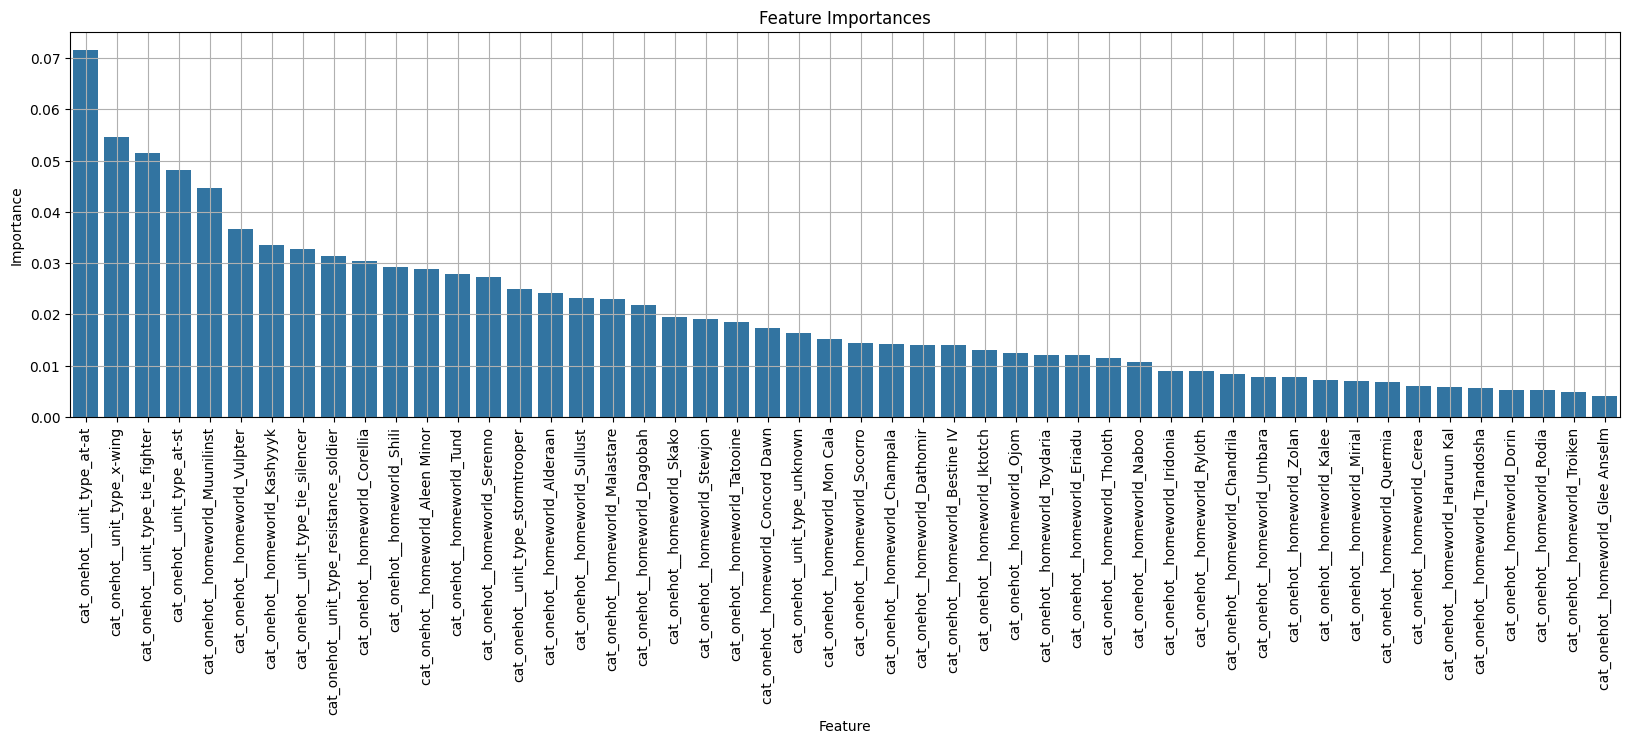

In [21]:
# creating plot
plt.figure (figsize=(20,5))
plt.title('Feature Importances')
sns.barplot(feature_importances.sort_values(by='Importance', ascending=False), x='Feature', y='Importance', errorbar=None)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

In [35]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning
param_grid = {
    "random_forest__max_depth": [i for i in range (1, 21)] + [None],
    'random_forest__min_samples_split': [2, 5, 8, 10, 12, 15, 20],
    'random_forest__min_samples_leaf': [2 ** i for i in range (0, 5)],
    'random_forest__criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
tuned_model = grid_search.best_estimator_

print(f"Best parameters: {grid_search.best_params_}")

Best parameters: {'random_forest__criterion': 'entropy', 'random_forest__max_depth': None, 'random_forest__min_samples_leaf': 4, 'random_forest__min_samples_split': 12}


Accuracy: 0.7475


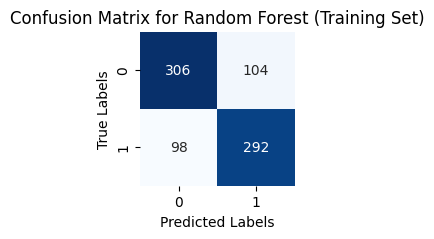

In [37]:
y_pred = tuned_model.predict (X_train)

eval_model (tuned_model, y_train, y_pred)

Accuracy: 0.63


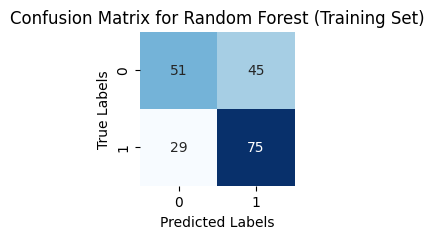

In [36]:
y_pred = model.predict (X_test)

eval_model (model, y_test, y_pred)

Accuracy: 0.65


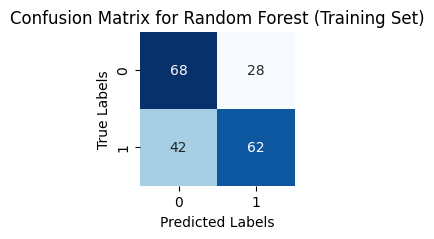

In [38]:
y_pred = tuned_model.predict (X_test)

eval_model (tuned_model, y_test, y_pred)

In [23]:
# saving to model as a pickle file
import pickle

with open('trained_model.pkl', 'wb') as file:
    pickle.dump(model, file)